# Sieć do nauki problemu XOR

## Zrealizowane założenia projektu

* Opis problemu, zaimplementowanych funkcji, zmiennych i stałych
* Wykresy błędów klasyfikacji, oraz MSE (obie warstwy) na przykładach uczących i całym zbiorze uczącym
* wykresy zmiany wag w obu warstwach wraz z nauką.

* kończenie nauki przy osiągnięciu MSE o zadanej wartości,
* nauka za pomocą mini-batch.

<!-- 
## Mini kanban:
### Waiting
* dodanie momentum,
* adaptacyjny współczynnik uczenia

### In progres

### Ready
* Wykresy błędu MSE - dla całego ciągu uczącego 
* Dodać opisy zdjęć - skąd są
* ujednolicić nazwy zmiennych
* nazwa dla learn
* Opis zaimplementowanych funkcji
* Opis zaimplementowanych zmiennych i stałych - eze

### Done
* Zaimplelentować mini - batche 
* Wykresy błędu MSE    - dla warstwy ukrytej MSE
* Wykresy błędu MSE - dla przykładu uczącego
* szybsze kończenie uczenia przy spadku MSE poniżej zadanej wartości
* wykresy błędu klasyfikacji
* wykresy błędu klasyfikacji (przyjmujemy próg 0.5 dla klasyfikacji 0-1)
* Krótki opis problemu
* wykresy wag w obu warstwach. -->

## Część teoretyczna


### Opis Problemu - MLP for XOR problem
Problem XOR (Exclusive OR) stanowi kluczowy problem w uczeniu maszynowym, który ilustruje wyzwania związane z tworzeniem modeli opartych na neuronach lub sieciach neuronowych.

XOR to logiczna operacja, która zwraca prawdę (true) tylko wtedy, gdy x1 != x2


Problem polega na tym, że XOR nie jest liniowo separowalny - oznacza to, że nie można podzielić przestrzeni wejść linią (linią prostą w dwóch wymiarach lub płaszczyzną w trzech wymiarach), aby poprawnie oddzielić przypadki prawdziwe od fałszywych.


Tradycyjne modele liniowe, takie jak regresja logistyczna czy perceptron, nie są w stanie modelować funkcji XOR, ponieważ nie mogą stworzyć odpowiedniego podziału przestrzeni wejść. Jednak sieci neuronowe z warstwą ukrytą potrafią rozwiązać ten problem poprzez tworzenie nieliniowych kombinacji wejść. Wprowadzenie warstwy ukrytej pozwala na stworzenie odpowiednich granic decyzyjnych w przestrzeni cech, umożliwiając modelowi na nauczenie się funkcji XOR.


W celu sprawnego nauczenia sieci i przedstawienia skondensowanych wyników, sieć domyślnie jest uczona 4 przypadków jednocześnie, tj zbierane są gradienty dla każdego przypdadku wejścia XOR i zmiany dW1, db1, dW2, db2 są wszystkie nakładane jednocześnie.  

## Projekt sieci

### Schemat
![poglądowy schemat sieci dla problemu xor](./photos/schemat_sieci.jpg)

*Zdj. 4. Rysunek poglądowy projektowanej sieci dla problemu XOR*

Sieć ma strukturę 2 - 2 - 1. Co oznacza:

2 wejścia [0,1]
2 neurony w warstwie ukrytej
1 neuron wyjściowy


### Funkcja aktywacji
wybrana funkcja aktywacji dla 1. i 2. warstwy to activate, jej wzór wyglada następujaco:

$${\displaystyle \sigma (x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{1+e^{x}}}=1-\sigma (-x).}$$

Pochodna funkcji activate potrzebna do wstecznej propagacji, ma wzór:

$${\displaystyle {\frac {d}{d x}\sigma (x)}=\sigma (x)(1-\sigma (x)).}$$

### Forward Propagation and Backpropagation

#### Forward Propagation:

1. **First Layer Activation:**
   
      $$U^{[1]} = W^{[1]} X + B^{[1]}$$
   
   $$
   Y^{[1]} = \sigma(U^{[1]})
   $$

2. **Second Layer Activation:**
   $$
   U^{[2]} = W^{[2]} Y^{[1]} + B^{[2]}
   $$
   $$
   Y^{[2]} = \sigma(U^{[2]})
   $$

#### Backpropagation:

1. **Error at Output:**
   $$
   D^{[2]} = Y^{[2]} - T
   $$

2. **Gradient of the Activation (Second Layer):**
   $$
   e^{[2]} = D^{[2]} \odot \sigma'(U^{[2]})
   $$
   (where \( \odot \) denotes element-wise multiplication)

3. **Gradient of Weights for Second Layer:**
   $$
   \delta W^{[2]} = e^{[2]} (Y^{[1]})^T
   $$

4. **Gradient of Bias for Second Layer:**
   $$
   \delta B^{[2]} = \sum e^{[2]}
   $$

5. **Gradient of the Activation (First Layer):**
   $$
   e^{[1]} = (W^{[2]})^T e^{[2]} \odot \sigma'(U^{[1]})
   $$

6. **Gradient of Weights for First Layer:**
   $$
   \delta W^{[1]} = e^{[1]} (X)^T
   $$

7. **Gradient of Bias for First Layer:**
   $$
   \delta B^{[1]} = \sum e^{[1]}
   $$

---

### Parameter Update Rules

The parameter update rules using gradient descent are as follows:

1. **Update Weights (Second Layer):**
   $$
   W^{[2]} = W^{[2]} - \text{lr} \cdot \delta W^{[2]}
   $$

2. **Update Biases (Second Layer):**
   $$
   B^{[2]} = B^{[2]} - \text{lr} \cdot \delta B^{[2]}
   $$

3. **Update Weights (First Layer):**
   $$
   W^{[1]} = W^{[1]} - \text{lr} \cdot \delta W^{[1]}
   $$

4. **Update Biases (First Layer):**
   $$
   B^{[1]} = B^{[1]} - \text{lr} \cdot \delta B^{[1]}
   $$

---

### Dimensions of Weight and Bias Matrices

- $Y^{[0]} = X$: 2 x 1
- $U^{[1]} \sim Y^{[1]}$: 2 x 1
- $W^{[1]}$: 2 x 2, bo $W^{[1]} Y^{[0]} \sim U^{[1]}$
- $B^{[1]}$: 2 x 1
- $U^{[2]} \sim Y^{[2]}$: 1 x 1
- $W^{[1]}$: 1 x 2, bo $W^{[2]} Y^{[1]} \sim U^{[2]}$
- $B^{[2]}$: 1 x 1
---

## Implementacja sieci

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

In [11]:
now = datetime.now().second
np.random.seed(now)

Funkcja aktywacji i jej pochodna 

In [ ]:
def activate(x): 
	return 1.0/(1.0 + np.exp(-x))

def activate_prime(x): 
    return x * (1 - x)
    

Parametry poczatkowe - wagi i bajasy

In [13]:
# funckja inicjalizująca
def initialize_params():
    W1 = np.random.rand(2,2)-0.5
    b1 = np.random.rand(1,2)-0.5
    W2 = np.random.rand(2,1)-0.5
    b2 = np.random.rand(1,1)-0.5

    print(np.random.uniform(-0.5,0.5,(2,2)))
    print(np.random.rand(2,2)-0.5)
    return W1, b1, W2, b2

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    # 1. warstwa
    U1 = np.dot(X,W1) + b1 # przemnożenie przez wagi i dodanie bajasów 
    Y1 = activate(U1) # funkcja aktywacji
    
    # 2. warstwa
    U2 = np.dot(Y1,W2) + b2 # przemnożenie przez wagi i dodanie bajasów 
    Y2 = activate(U2) # funkcja aktywacji
    
    return Y1, Y2


def learn_from_batch (X,T,A2cu,Tc,Y1, Y2, W2,lr):
    # obliczanie błędów dla przykładu uczącego

    #W2
    D2 = T - Y2 # błąd 2. warstwy
    e2 = D2 * activate_prime(Y2) # błędy neuronów 2. warstwy
    #W1
    D1 = e2.dot(W2.T) # błąd 1. warstwy
    e1 = D1 * activate_prime(Y1) # błędy neuronów w 1. warstwy

    MSE2_p = np.mean(D2 ** 2) # błąd_średniokwadratowy 2. warstwy
    MSE1_p = np.mean(D1 ** 2) # błąd_średniokwadratowy 1. warstwy

    #wyliczanie odpowiednich gradientów dla wag sieci na Przykładzie uczącym
    dW1 = lr * X.T.dot(e1)
    db1 = lr * np.sum(e1,axis=0,keepdims=True)
    dW2 = lr * Y1.T.dot(e2) 
    db2 = lr * np.sum(e2,axis=0,keepdims=True)

    # obliczanie błędów dla ciągu uczącego
    D2cu = Tc - A2cu # błąd 2. warstwy
    e2cu = D2cu * activate_prime(A2cu) # błędy neuronów 2. warstwy
    MSE2_c = np.mean(D2cu ** 2) # błąd 1. warstwy
    MSE1_c = np.mean(e2cu.dot(W2.T) ** 2) # błąd 1. warstwy

    #obliczanie błędy klasyfikacji
    Out_err = np.abs(T - Y2) > 0.5
    classificationError = Out_err.sum()/T.size*100.0

    
    return dW1, db1, dW2, db2,MSE1_c, MSE2_c, MSE1_p,MSE2_p, classificationError



In [35]:
def get_data_batch (Xc,Tc,Xch,Tch,batch): #wybranie ze zbioru uczącego odpowiedniego batcha
    X_ = []
    T_ = []
    for _ in range(0,batch):
        X_.append(Xch[0])
        Xch = np.delete(Xch,0,0)
        if len(Xch) == 0:
            Xch = Xc.copy()
        T_.append(Tch[0])
        Tch = np.delete(Tch,0,0)
        if len(Tch) == 0:
            Tch = Tc.copy()
    return Xc, Tc,Xch,Tch,np.array(X_),np.array(T_)

def supervised_learning(X, T, lr, iterations, logs = True, batch_size = 2, mse_threshold = 0.005):
    W1, b1, W2, b2 = initialize_params()    # funkcja zwraca losowe początkowe wagi i bajasy używane w sieci
    W1_history = [W1]  # Wagi 1. warstwy
    B1_history = [b1]  # Bajasy 1. warstwy
    W2_history = [W2]  # Wagi 2. warstwy
    B2_history = [b2]  # Bajasy 2. warstwy
    Xc = X     # Ciąg uczący X
    Tc = T     # Ciąg uczący T
    Xch = X    # X checkpoint
    Tch = T    # T checkpoint
    CE = []     # classification error - procent błędnych klasyfikacji
    MSE2p = []   # MSE - błąd średniokwadratowy 2. warstwy dla przykładu uczącego
    MSE1p = []   # MSE - błąd średniokwadratowy 1. warstwy dla przykładu uczącego
    MSE2c = []   # MSE - błąd średniokwadratowy 2. warstwy dla ciągu uczącego
    MSE1c = []   # MSE - błąd średniokwadratowy 1. warstwy dla ciągu uczącego
    for i in range(iterations):
        Xc, Tc,Xch,Tch, X,T = get_data_batch (Xc,Tc,Xch,Tch,batch_size) # wyznaczenie przykłądu uczącego zgodnie z zadaną wielkością batch_size
        
        #zbieramy działanie sieci dla przykładu i dla ciągu uczącego
        Y1, Y2 = forward_prop(W1, b1, W2, b2, X)
        _,Y2cu = forward_prop(W1,b1,W2, b2,Xc)

        dW1, db1, dW2, db2, MSE1_c, MSE2_c, MSE1_p,MSE2_p,ce = learn_from_batch (X,T,Y2cu,Tc, Y1, Y2,W2, lr) # wyliczenie poprawek dla wag i bajasów 
        
        # zapisywanie błędów
        MSE2p.append(MSE2_p)
        MSE1p.append(MSE1_p)
        MSE2c.append(MSE2_c)
        MSE1c.append(MSE1_c)
        CE.append(ce)
        
        # Aktualizacja wag i bajasów
        W1 = W1 + dW1
        b1 = b1 + db1  
        W2 = W2 + dW2 
        b2 = b2 + db2
        
        # Zebranie parametrów sieci w celu wizualizacji
        W1_history.append(W1)
        B1_history.append(b1)
        W2_history.append(W2)
        B2_history.append(b2)
        
        
        # Co 1000 iteracji zostają wypisane wartości wyjściowe sieci zestawione z wartościami oczekiwanymi
        if i % 1000 == 0 and logs:
            print("Iteration: ", i)
            print(Y2.T)
            print(T.T)
            
        # Uczenie zostanie przerwane kiedy MSE spadnie poniżej zadanego progu
        if MSE2_c <= mse_threshold:
            break
        

    return W1_history, B1_history, W2_history, B2_history, CE, MSE1p, MSE2p, MSE1c, MSE2c

Wywołanie programu uczącego:

In [36]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
T = np.array([[0],[1],[1],[0]]) 
W1_history, B1_history, W2_history, B2_history , CE, MSE1, MSE2, MSE1cu, MSE2cu = supervised_learning(X, T, 0.5, 30000, logs = False, batch_size = 2, mse_threshold = 0.005)

[[-0.08272634 -0.209264  ]
 [ 0.18932726  0.41983993]]
[[0.0793105  0.17015224]
 [0.1439989  0.16250878]]


## Wizualizacje

### Błąd klasyfikacji CE

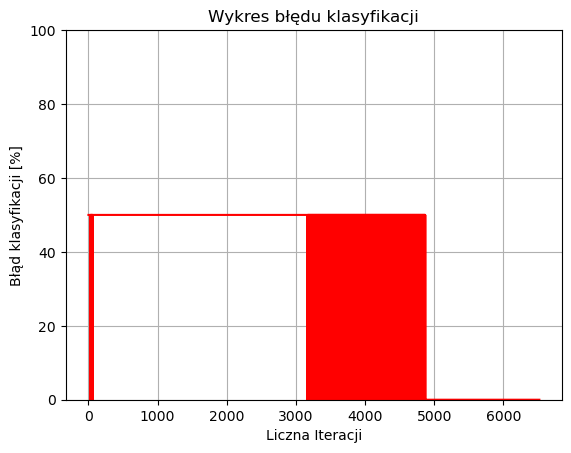

In [37]:
plt.plot(CE,'r')
plt.grid(True)
plt.xlabel('Liczna Iteracji')
plt.ylabel('Błąd klasyfikacji [%]')
plt.ylim([0, 100])
plt.title('Wykres błędu klasyfikacji')
plt.show()

### Błąd średniokwadratowy MSE

(pomarańczowy to prosta linia bo jest to średnia)

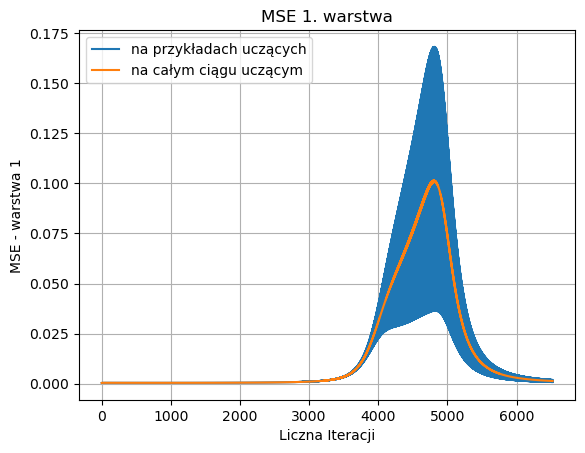

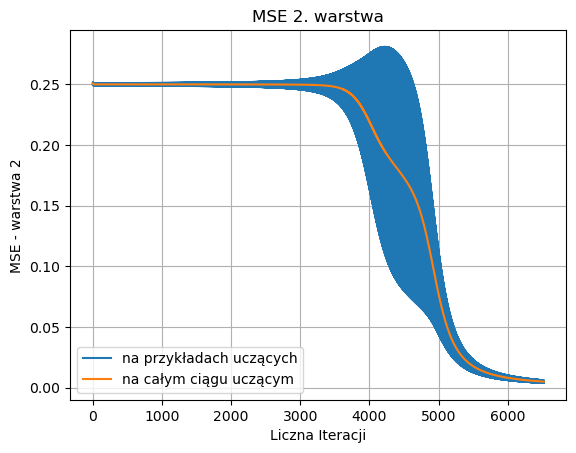

In [38]:
plt.plot(MSE1, label='na przykładach uczących')
plt.plot(MSE1cu, label='na całym ciągu uczącym')
plt.grid(True)
plt.ylabel('MSE - warstwa 1')
plt.xlabel('Liczna Iteracji')
plt.title('MSE 1. warstwa')
plt.legend()

plt.show()

plt.plot(MSE2, label='na przykładach uczących')
plt.plot(MSE2cu, label='na całym ciągu uczącym')
plt.grid(True)
plt.ylabel('MSE - warstwa 2')
plt.xlabel('Liczna Iteracji')
plt.title('MSE 2. warstwa')
plt.legend()
plt.show()



### Wagi i bajasy

Wykresy dla 1 warstwy

uwaga: tym samym kolorem na wykresach zaznaczono wagi i bajasy "wchodzące" do tego samego neuronu w warstwie 1.

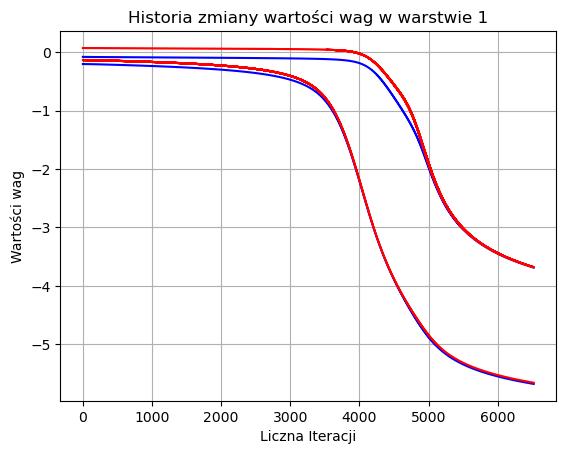

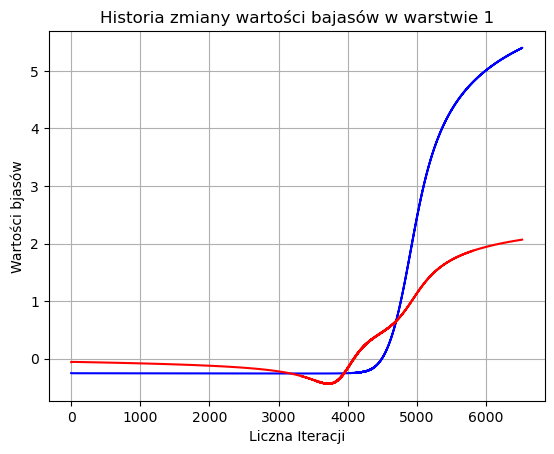

In [39]:
plt.plot([W1_history[n][0]for n in range(0,len(W1_history))],'b')
plt.plot([W1_history[n][1] for n in range(0,len(W1_history))],'r')
plt.grid(True)
plt.xlabel('Liczna Iteracji')
plt.ylabel('Wartości wag')
plt.title('Historia zmiany wartości wag w warstwie 1')
plt.show()

plt.plot([[B1_history[n][0][0]] for n in range(0,len(B1_history))],'b')
plt.plot([[B1_history[n][0][1]] for n in range(0,len(B1_history))],'r')
plt.grid(True)
plt.xlabel('Liczna Iteracji')
plt.ylabel('Wartości bjasów')
plt.title('Historia zmiany wartości bajasów w warstwie 1')
plt.show()

Wykresy dla 2 warstwy

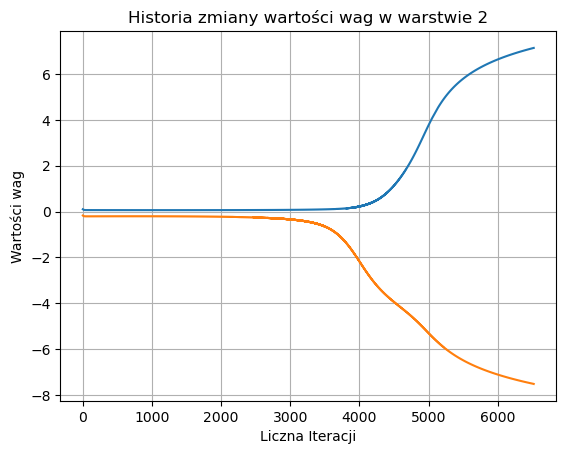

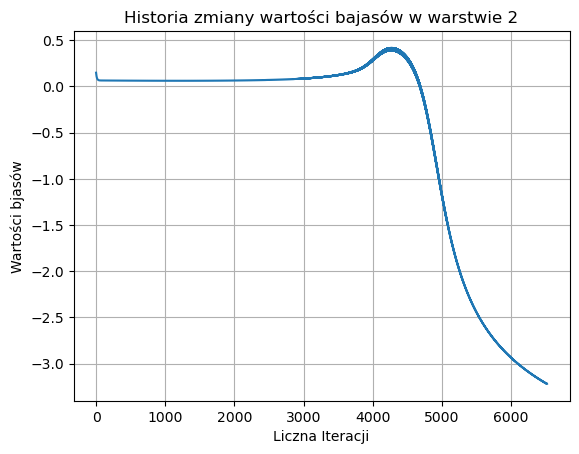

In [40]:
plt.plot([np.concatenate((W2_history[n][0],W2_history[n][1]),axis=0) for n in range(0,len(W2_history))])
plt.grid(True)
plt.xlabel('Liczna Iteracji')
plt.ylabel('Wartości wag')
plt.title('Historia zmiany wartości wag w warstwie 2')
plt.show()

plt.plot([B2_history[n][0] for n in range(0,len(W2_history))])
plt.grid(True)
plt.xlabel('Liczna Iteracji')
plt.ylabel('Wartości bjasów')
plt.title('Historia zmiany wartości bajasów w warstwie 2')
plt.show()

## Wnioski

* Sieć neuronowa jest skomplikowaną funkcją matematyczną, której działanie zależy od licznych parametrów, takich jak wagi i obciążenia.

* Metoda uczenia stochastycznego, polegająca na uczeniu modelu na pojedynczych przykładach, jest zazwyczaj mniej efektywna w porównaniu do uczenia wsadowego, w którym model jest trenowany na całym zbiorze danych jednocześnie, a gradienty są uśredniane. Często, najlepsze wyniki uzyskuje się przy zastosowaniu mini-wsadowego uczenia, które łączy zalety obu tych podejść, ucząc model na małych partiach danych.

* Określenie kryterium stopu jest kluczowe w procesie uczenia maszynowego, ponieważ pozwala na zakończenie procesu w odpowiednim momencie, zapobiegając niepotrzebnym obliczeniom. Na przykład, w metodzie optymalizacji gradientowej, kontynuowanie obliczeń po osiągnięciu lokalnego minimum błędu (np. brak poprawy przez określoną liczbę iteracji) jest nieopłacalne, gdyż dalsze iteracje nie prowadzą do istotnej poprawy.

* Współczynnik uczenia (learning rate) reguluje, jak bardzo zmiana w błędzie wpływa na aktualizację parametrów sieci. Dobór odpowiedniego współczynnika jest kluczowy – zbyt wysoka wartość może prowadzić do niestabilności, a zbyt niska sprawia, że proces optymalizacji staje się wolny i może utknąć w lokalnym minimum. Odpowiednie dobranie tego parametru zapewnia płynny postęp w treningu modelu.

## Żródła

* Artykuł Jasona Brownlee PhD pt. "A Gentle Introduction to Mini-Batch Gradient Descent and How to Configure Batch Size" https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

* Poradnik autorstwa Samson Zhang na platformie Kaggle https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras

* Publikacja dr. Ciskowskiego zatytułowana "Poznawanie własności sieci neuronowych w środowisku MATLAB" https://dbc.wroc.pl/dlibra/publication/22701/edition/19826?language=pl

* Artykuł Aniruddha Karajgi pt. "How Neural Networks Solve the XOR Problem" https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7

* Artykuł Siddhartha Dutta pt. "Implementing the XOR Gate using Backpropagation in Neural Networks" https://towardsdatascience.com/implementing-the-xor-gate-using-backpropagation-in-neural-networks-c1f255b4f20d

* Artykuł "Neural Network XOR Example from Scratch (No Libs)" https://www.codingame.com/playgrounds/59631/neural-network-xor-example-from-scratch-no-libs

* Wykłady i materiały - udostępne na platformie e-portal. 